<a href="https://colab.research.google.com/github/TadimarriMuzammil/whatsapp_chat_analysis/blob/main/whatsapp_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary packages
install.packages(c("rlang", "rwhatsapp", "dplyr", "tidytext"))

# Load the required libraries
library(rlang)
library(rwhatsapp)
library(dplyr)
library(tidytext)
install.packages("tm")
install.packages("caret")
install.packages("e1071")
install.packages("ggplot2")

library(tm)
library(caret)
library(e1071)
library(ggplot2)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’



Attaching package: ‘rlang’


The following object is masked from ‘package:base’:

    %||%



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


In [ ]:

 #Verify file path
file_path <- "/content/WhatsApp Chat with Rohith (Aid).txt"
if (!file.exists(file_path)) {
  stop("File not found at the specified path.")
}

# Read the WhatsApp chat
chat <- rwa_read(file_path)

# Filter out entries where author is null and calculate additional metrics
chat <- chat %>%
  filter(!is.na(author)) %>%
  mutate(count_character = nchar(text),
         words = nchar(gsub('[^ ]+', '', text)) + 1)

# Define words to remove
to_remove <- c(stop_words$word, "media", "message", "deleted", "https", "www",
               "omitted", "ref", "dass", "aan", "aa", "aan", "nee", "oru", "njan", "ok", "No", "no", "yes", "Ok", "Yes", "android.s.wt", "he")



chat_clean <- chat %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)


chat_clean <- chat_clean %>%
  na.omit(chat_clean)

chat_clean <- chat_clean %>%
  filter(!word %in% to_remove)

print(head(chat_clean))

Joining with `by = join_by(word)`


# A tibble: 6 × 8
  time                author      source emoji  emoji_name count_character words
  <dttm>              <fct>       <chr>  <list> <list>               <int> <dbl>
1 2022-03-22 12:05:00 Rohith (Ai… /cont… <NULL> <NULL>                  61     9
2 2022-03-22 12:05:00 Rohith (Ai… /cont… <NULL> <NULL>                  61     9
3 2022-03-22 12:05:00 Rohith (Ai… /cont… <NULL> <NULL>                  61     9
4 2022-03-22 12:05:00 Rohith (Ai… /cont… <NULL> <NULL>                  61     9
5 2022-03-22 12:05:00 Rohith (Ai… /cont… <NULL> <NULL>                  61     9
6 2022-03-22 12:05:00 Rohith (Ai… /cont… <NULL> <NULL>                  61     9
# ℹ 1 more variable: word <chr>


In [ ]:

library(lubridate)
library(tidyr)
library(stringr)

# Assuming you've already read the chat data and stored it in 'chat'

daysed <- c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")

# Number of days with messages
no_of_days_of_messages <- chat %>%
  mutate(day = as.Date(time)) %>%
  summarise(no = length(unique(day))) %>%
  pull(no)

# Oldest date in the chat
most_oldest_date <- as.POSIXct(as.numeric(min(chat$time)), origin = "1970-01-01", tz = "UTC")
most_oldest_date <- format(most_oldest_date, "%Y-%m-%d %H:%M:%S")

# Newest date in the chat
most_recent_date <- as.POSIXct(as.numeric(max(chat$time)), origin = "1970-01-01", tz = "UTC")
most_recent_date <- format(most_recent_date, "%Y-%m-%d %H:%M:%S")




# Total number of days between oldest and newest date
total_no_of_days <-round( as.numeric(difftime(most_recent_date, most_oldest_date, units = "days")))

# Number of days without any messages
no_of_days_without_messages <- total_no_of_days - no_of_days_of_messages

# Percentage of days without any messages
percent_days_without_messages <- round(no_of_days_without_messages / total_no_of_days * 100, 2)

# Most active day
most_active_day <- as.Date(names(which.max(table(as.Date(chat$time, origin = "1970-01-01")))))
most_active_day <- format(most_active_day, "%Y-%m-%d")



# Most active day of the week
most_active_day_of_week <- chat %>%
  mutate(day = wday(as.Date(time), week_start = 1)) %>%
  count(day) %>%
  top_n(1) %>%
  pull(day)
most_active_day_of_week <- daysed[most_active_day_of_week]

# Total number of messages
total_no_of_messages <- nrow(chat)

# Number of unique users
total_no_of_users <- n_distinct(chat$author)

# Average number of messages per day
messages_per_day <- round(total_no_of_messages / no_of_days_of_messages)

# Number of deleted messages
deleted_messages <- chat %>%
  filter(text %in% c("This message was deleted", "You deleted this message")) %>%
  count()

# Average number of words per message
avg_no_of_words <- chat %>%
  summarise(n = round(mean(words)) )

# Average number of characters per message
avg_no_of_characters <- chat %>%
  filter(text != "<Media omitted>") %>%
  filter(text != "This message was deleted") %>%
  filter(text != "You deleted this message") %>%
  summarise(n =round( mean(nchar(text))))

# Number of smileys
no_of_smiley <- chat %>%
  unnest(emoji) %>%
  count()

# Number of unique smileys
unique_smiley <- chat %>%
  unnest(emoji) %>%
  count(emoji, sort = TRUE) %>%
  count()

# Number of media messages
no_of_media <- chat %>%
  filter(text == "<Media omitted>") %>%
  count()

# Number of messages containing links
no_of_links <- chat %>%
  filter(str_detect(text, "www.") | str_detect(text, "http:") | str_detect(text, "https:") | str_detect(text, "youtu.be")) %>%
  count()

# Number of people who left the chat
no_people_who_left <- chat %>%
  filter(is.na(author)) %>%
  filter(str_detect(text, ".left")) %>%
  count()

# Number of times the group name was changed
no_times_chat_changed <- chat %>%
  filter(is.na(author)) %>%
  filter(str_detect(text, ".changed.")) %>%
  count()

# Create a data frame to present the results
result_table <- data.frame(
  Metric = c("Number of days with messages",
             "Oldest date in the chat",
             "Newest date in the chat",
             "Total number of days",
             "Number of days without messages",
             "Percentage of days without messages",
             "Most active day",
             "Most active day of the week",
             "Total number of messages",
             "Number of unique users",
             "Average number of messages per day",
             "Number of deleted messages",
             "Average number of words per message",
             "Average number of characters per message",
             "Number of smileys",
             "Number of unique smileys",
             "Number of media messages",
             "Number of messages containing links",
             "Number of people who left the chat",
             "Number of times the group name was changed"),
  Value = c(no_of_days_of_messages,
            most_oldest_date,
            most_recent_date,
            total_no_of_days,
            no_of_days_without_messages,
            percent_days_without_messages,
            most_active_day,
            most_active_day_of_week,
            total_no_of_messages,
            total_no_of_users,
            messages_per_day,
            deleted_messages$n,
            avg_no_of_words$n,
            avg_no_of_characters$n,
            no_of_smiley$n,
            unique_smiley$n,
            no_of_media$n,
            no_of_links$n,
            no_people_who_left$n,
            no_times_chat_changed$n)
)

#print(result_table)
# Print the table with proper alignment
knitr::kable(result_table, align = 'c',  col.names = c("Metric", "Value"))



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Selecting by n




|                   Metric                   |        Value        |
|:------------------------------------------:|:-------------------:|
|        Number of days with messages        |         228         |
|          Oldest date in the chat           | 2022-03-22 12:05:00 |
|          Newest date in the chat           | 2024-05-17 12:54:00 |
|            Total number of days            |         787         |
|      Number of days without messages       |         559         |
|    Percentage of days without messages     |        71.03        |
|              Most active day               |     2022-10-23      |
|        Most active day of the week         |      Wednesday      |
|          Total number of messages          |        3889         |
|           Number of unique users           |          2          |
|     Average number of messages per day     |         17          |
|         Number of deleted messages         |         23          |
|    Average number of words per

Selecting by n


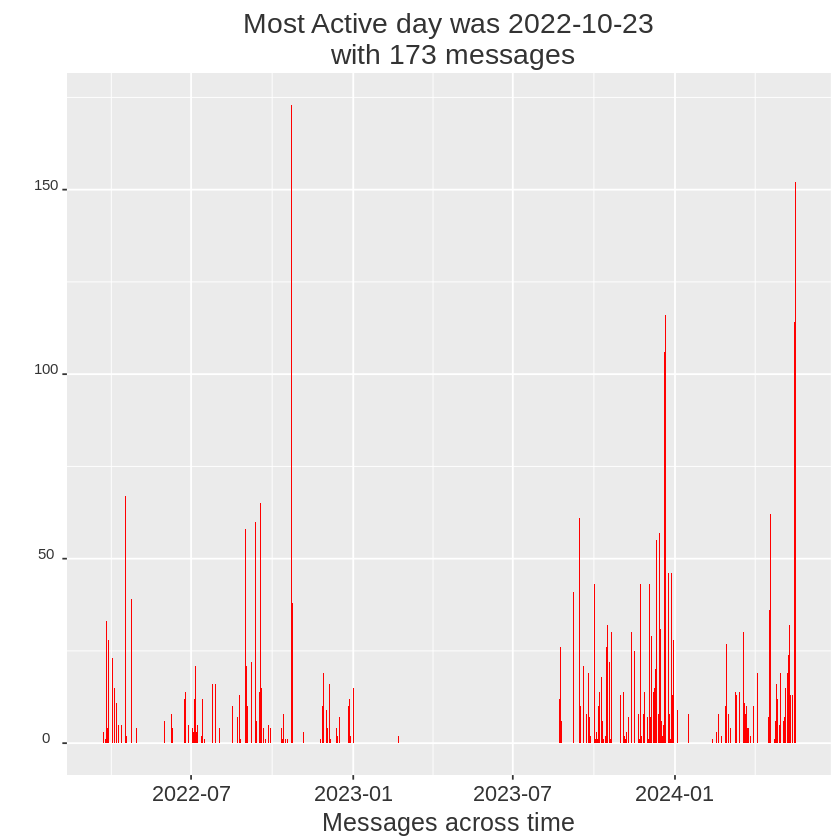

In [ ]:
# Load the required library for ggplot2
library(ggplot2)

# Then proceed with your code
var <- chat %>%
  mutate(date = date(time)) %>%
  count(date) %>%
  top_n(1)

title <- paste0("Most Active day was ", var %>% pull(date), "\n with ", var %>% pull(n), " messages")

chat %>%
  mutate(day = date(time)) %>%
  count(day) %>%
  ggplot(aes(x = day, y = n)) +
  geom_bar(stat = "identity", fill = "red") +
  xlab("Messages across time") + ylab("") +
  ggtitle(title) +
  theme(axis.text.x = element_text(color = "grey20", size = 13, angle = 0, hjust = .5, vjust = .5, face = "plain"),
        axis.text.y = element_text(color = "grey20", size = 9, angle = 0, hjust = .5, vjust = 0, face = "plain"),
        plot.title = element_text(color = "grey20", size = 17, angle = 0, hjust = .5, vjust = 0, face = "plain"),
        axis.title.x = element_text(color = "grey20", size = 15, angle = 0, hjust = .5, vjust = 0, face = "plain"),
        axis.title.y = element_text(color = "grey20", size = 13, angle = 90, hjust = .5, vjust = .5, face = "plain"))


Selecting by words
Selecting by words


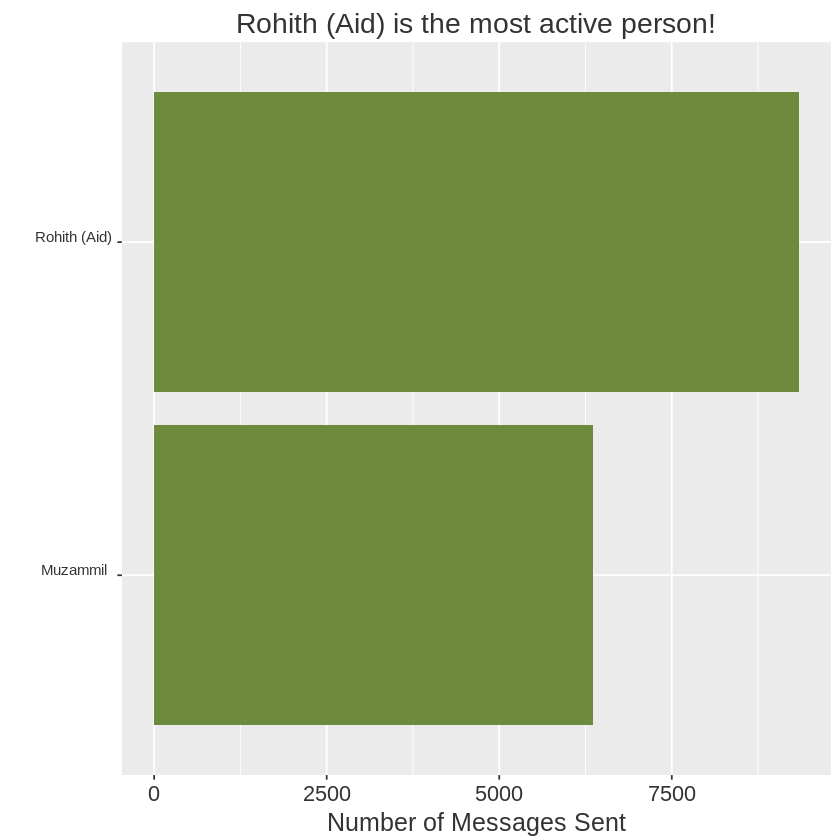

In [ ]:
title<-paste0(chat %>% group_by(author) %>% summarise(words=sum(words)) %>% top_n(1) %>% pull(author)," is the most active person!")
      chat %>%
        group_by(author) %>%
        summarise(words=sum(words)) %>%
        top_n(12) %>%
        ggplot(aes(x = reorder(author, words), y = words)) +
        geom_bar(stat = "identity", fill="darkolivegreen4") +
        xlab("") + ylab("Number of Messages Sent") +
        coord_flip() +
        ggtitle(title)+
        theme(axis.text.x = element_text(color = "grey20", size = 13, angle = 0, hjust = .5, vjust = .5, face = "plain"),
                axis.text.y = element_text(color = "grey20", size = 9, angle = 0, hjust = .5, vjust = 0, face = "plain"),
                plot.title = element_text(color = "grey20", size = 17, angle = 0, hjust = .5, vjust = 0, face = "plain"),
                axis.title.x = element_text(color = "grey20", size = 15, angle = 0, hjust = .5, vjust = 0, face = "plain"),
                axis.title.y = element_text(color = "grey20", size = 13, angle = 90, hjust = .5, vjust = .5, face = "plain"))




Joining with `by = join_by(word)`


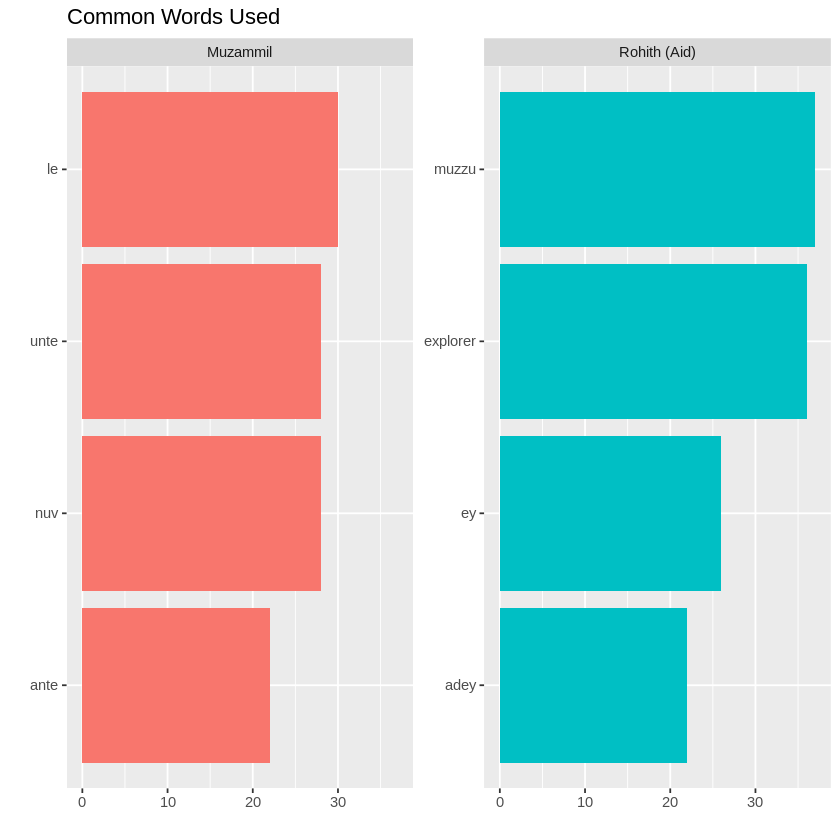

In [ ]:


# Assuming you have already defined and processed the chat data and defined to_remove

# Define and process chat_cleaned
chat_cleaned <- chat %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words) %>%
  na.omit() %>%
  filter(!word %in% to_remove)

# Check if chat_cleaned is defined
if (!exists("chat_cleaned")) {
  stop("chat_cleaned object not found. Please define and process chat_cleaned before this code block.")
}

# Continue with the analysis if chat_cleaned is found
chat_cleaned %>%
  select(word, author) %>%
  mutate(word = gsub(".com", "", word)) %>%
  mutate(word = gsub("^gag", "9gag", word)) %>%
  count(author, word, sort = TRUE) %>%
  bind_tf_idf(term = word, document = author, n = n) %>%
  filter(n > 5) %>%
  filter(author %in% top_chatters) %>%
  group_by(author) %>%
  top_n(n = 4, wt = tf_idf) %>%
  ggplot(aes(x = reorder_within(word, n, author), y = n, fill = author)) +
  geom_col(show.legend = FALSE) +
  ylab("") +
  xlab("") +
  coord_flip() +
  facet_wrap(~author, ncol = 3, scales = "free_y") +
  scale_x_reordered() +
  ggtitle("Common Words Used")


Selecting by n
Selecting by n


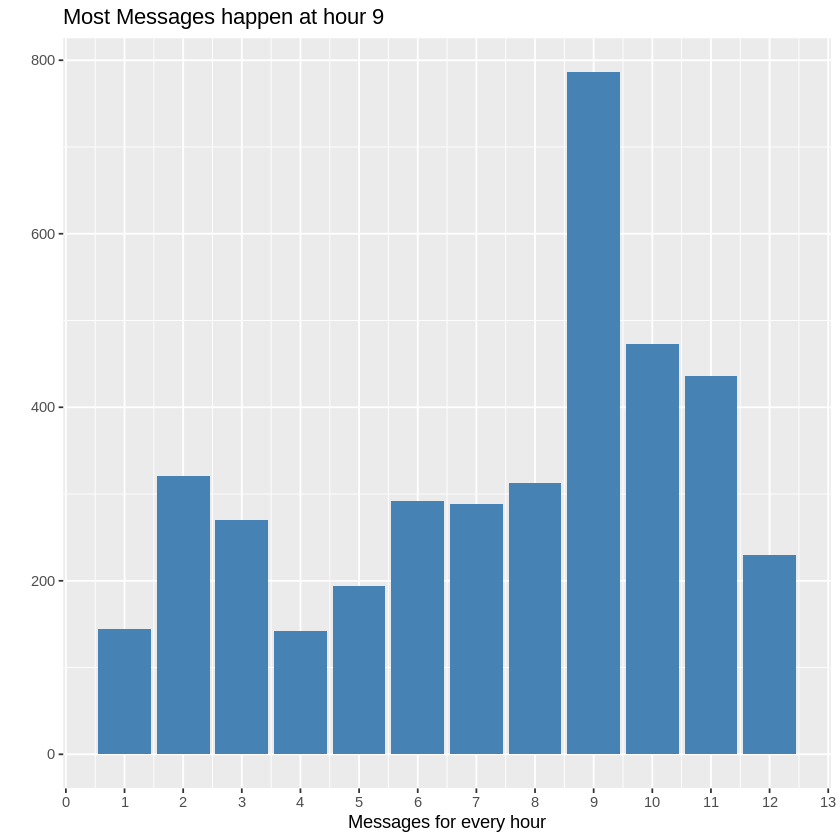

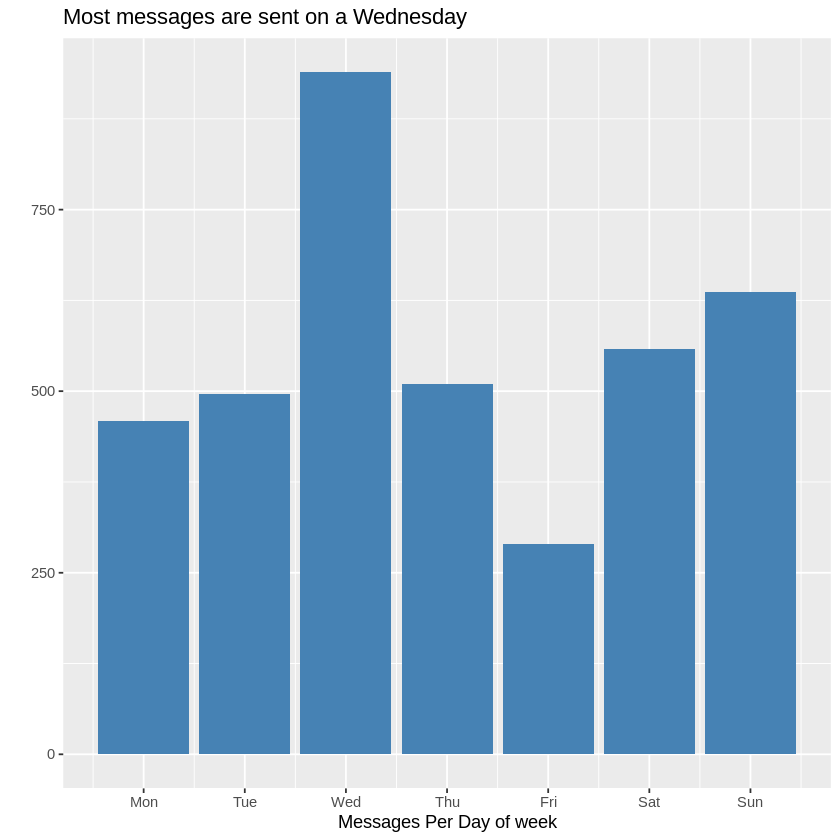

In [ ]:

# to find the hour when most messages are sent
title <- paste0("Most Messages happen at hour ", chat %>% mutate(hour = hour(time)) %>% count(hour) %>% top_n(1) %>% pull(hour))
chat %>%
  mutate(hour = hour(time)) %>%
  count(hour) %>%
  ggplot(aes(x = hour, y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  ylab("") + xlab("Messages for every hour") +
  ggtitle(title) +
  scale_x_continuous(breaks = 0:23)

# to find which day of the week most messages are being sent
daysed <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
most_active_day_of_week <- chat %>% mutate(day = wday(as.Date(time), week_start = 2)) %>% count(day) %>% top_n(1) %>% pull(day)
most_active_day_of_week <- daysed[most_active_day_of_week]
title <- paste0("Most messages are sent on a ", most_active_day_of_week)
days <- c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun") # for axis labels

chat %>%
  mutate(day = wday(as.Date(time), week_start = 2)) %>%
  count(day)  %>%
  ggplot(aes(x = day, y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  ylab("") + xlab("Messages Per Day of week") +
  ggtitle(title) +
  scale_x_continuous(breaks = 1:7, labels = days)


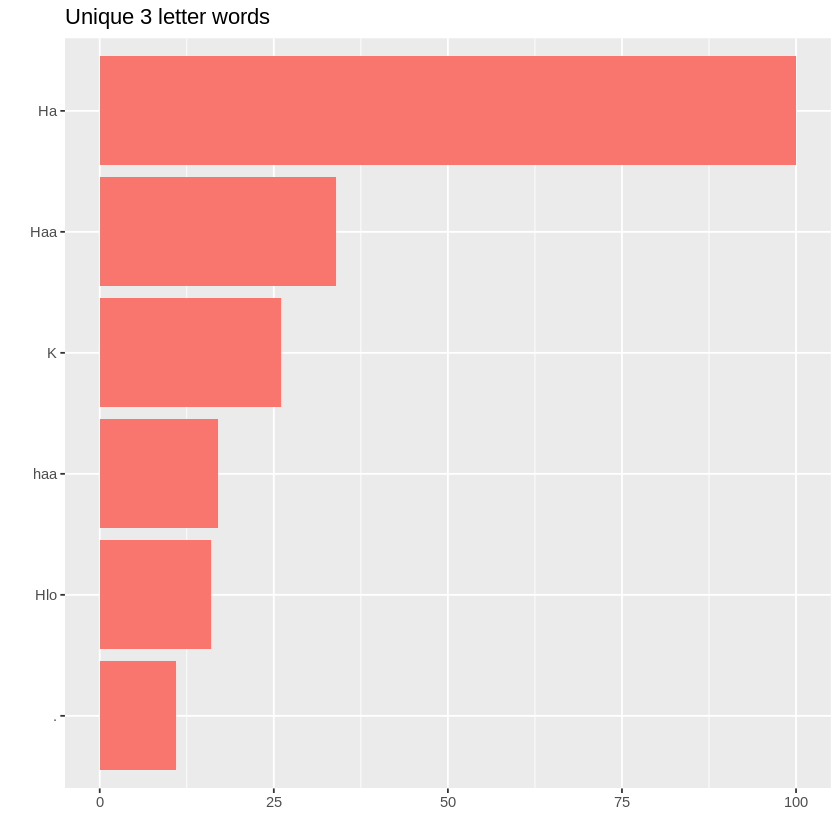

In [ ]:
chat %>% filter(emoji=="NULL") %>% filter(count_character<=3 & words ==1) %>%
  filter(!text %in% to_remove) %>%
  count(text, sort = TRUE) %>%
  top_n(n = 6, n) %>%
  ggplot(aes(x = reorder(text, n), y = n,fill="red")) +
  geom_col(show.legend = FALSE) +
  ylab("") + xlab("") +
  coord_flip() +
  ggtitle("Unique 3 letter words")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: RColorBrewer



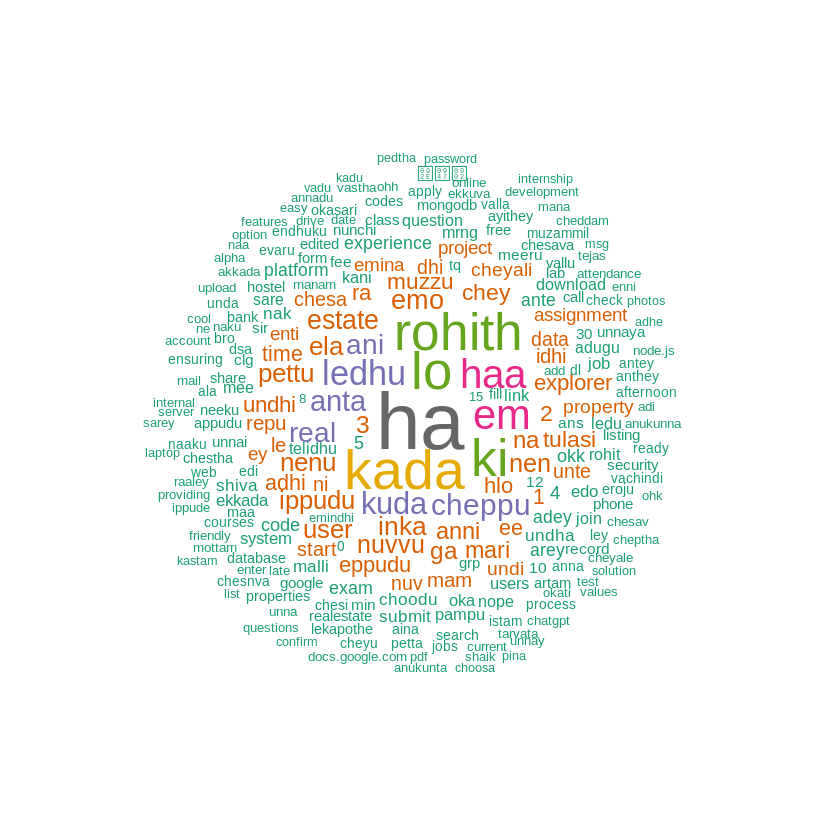

In [ ]:
# Install and load the required packages
install.packages("wordcloud")
library(wordcloud)
library(RColorBrewer)  # Required for brewer.pal function

# Assuming `chat` and `to_remove` are defined earlier

# Tokenize the text and filter out words to remove
df <- chat %>%
  unnest_tokens(input = text, output = word) %>%
  filter(!word %in% to_remove) %>%
  count(word, sort = TRUE)

# Create the word cloud
set.seed(1234) # for reproducibility
wordcloud(words = df$word, freq = df$n, min.freq = 5,
          max.words = 250, random.order = FALSE, rot.per = 0,
          colors = brewer.pal(8, "Dark2"))


In [ ]:
# Load necessary libraries for sentiment analysis and plotting
library(ggplot2)

# Use the Bing sentiment lexicon
bing_sentiments <- get_sentiments("bing")

# Join the chat data with the sentiment lexicon
chat_sentiment <- chat_clean %>%
  inner_join(bing_sentiments, by = "word") %>%
  count(author, index = row_number() %/% 10, sentiment, sort = TRUE) %>%
  ungroup()

# Calculate sentiment score
chat_sentiment_score <- chat_sentiment %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment_score = positive - negative)


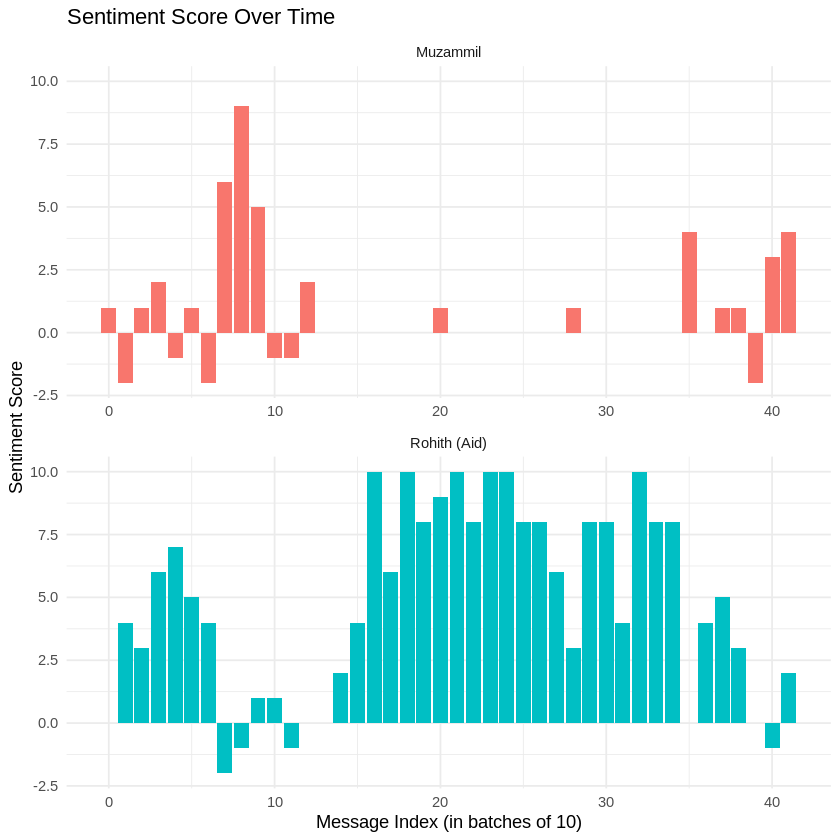

In [ ]:
# Plot sentiment score over time
ggplot(chat_sentiment_score, aes(index, sentiment_score, fill = author)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  facet_wrap(~author, ncol = 1, scales = "free_x") +
  labs(title = "Sentiment Score Over Time",
       x = "Message Index (in batches of 10)",
       y = "Sentiment Score") +
  theme_minimal()


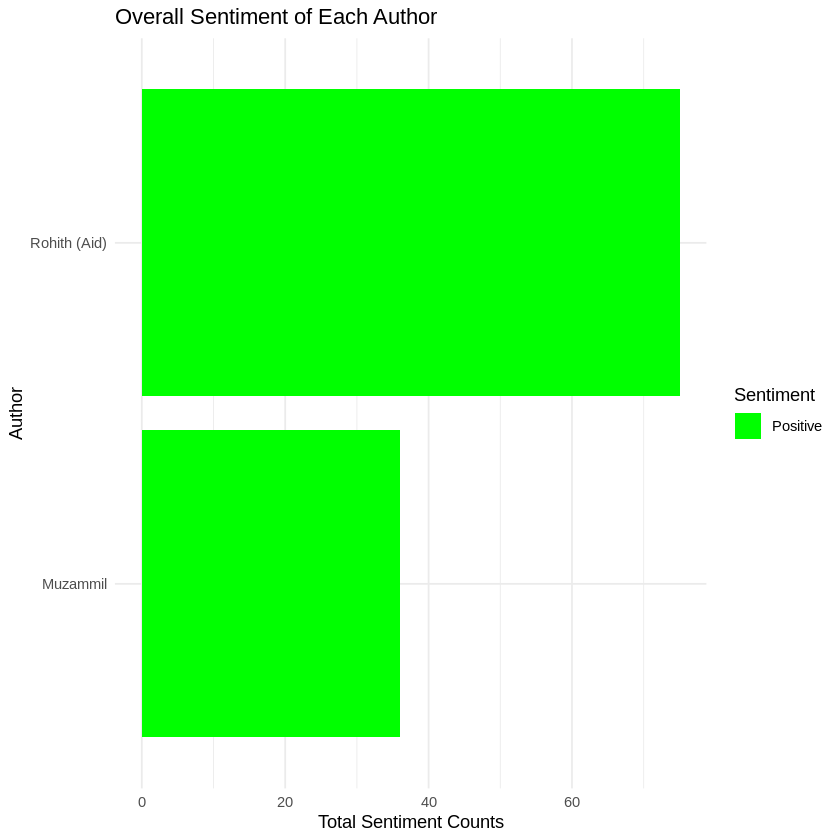

In [ ]:
# Summarize sentiment counts for each author
author_sentiment_summary <- chat_sentiment %>%
  count(author, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(total = positive + negative,
         sentiment_category = case_when(
           positive > negative ~ "Positive",
           negative > positive ~ "Negative",
           TRUE ~ "Neutral"
         ))

# Plot the overall sentiment for each author
ggplot(author_sentiment_summary, aes(x = reorder(author, total), y = total, fill = sentiment_category)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Positive" = "green", "Negative" = "red", "Neutral" = "blue")) +
  labs(title = "Overall Sentiment of Each Author",
       x = "Author",
       y = "Total Sentiment Counts",
       fill = "Sentiment") +
  theme_minimal() +
  coord_flip()

Warning message in createDataPartition(dtm_df$author, p = 0.8, list = FALSE):
“Some classes have a single record ( Muzammil, Rohith (Aid) ) and these will be selected for the sample”


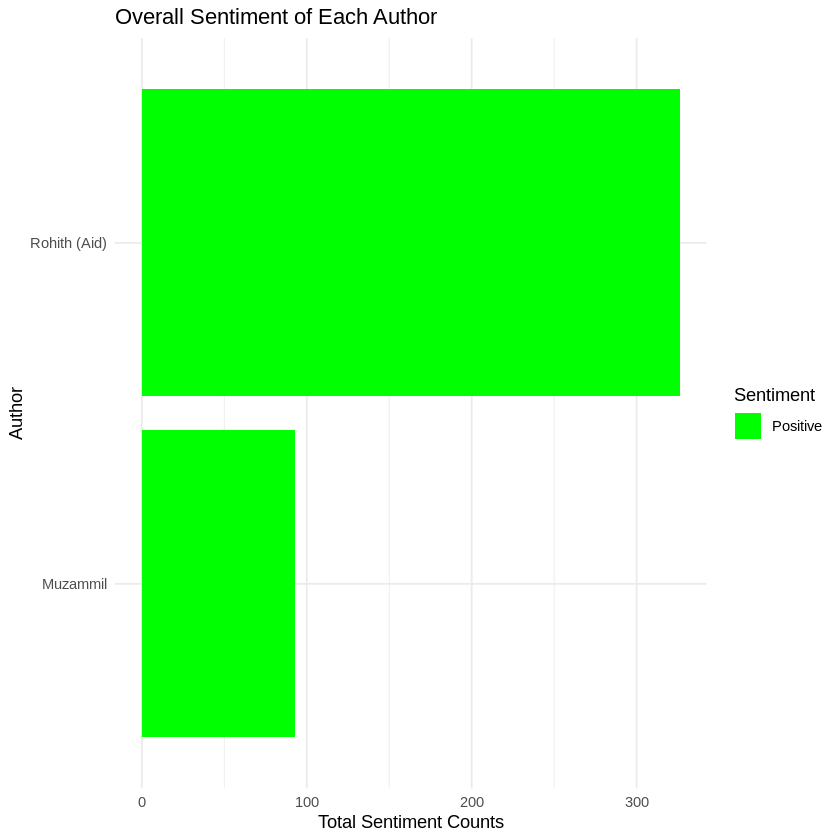

In [ ]:

# Convert document-term matrix to a data frame
dtm <- chat_clean %>%
  count(author, word, sort = TRUE) %>%
  cast_dtm(author, word, n)

dtm_df <- as.data.frame(as.matrix(dtm))
dtm_df$author <- rownames(dtm_df)

# Prepare the training data
set.seed(123)
train_index <- createDataPartition(dtm_df$author, p = 0.8, list = FALSE)
train_data <- dtm_df[train_index, ]
test_data <- dtm_df[-train_index, ]

# Ensure that the factor levels match between train and test sets
train_data$author <- factor(train_data$author)
test_data$author <- factor(test_data$author, levels = levels(train_data$author))

# Train a Naive Bayes model
model <- naiveBayes(author ~ ., data = train_data)

# Predict on the test data
predictions <- predict(model, newdata = test_data)

# Ensure predictions are factors with the same levels
predictions <- factor(predictions, levels = levels(train_data$author))



# Summarize sentiment counts for each author
chat_sentiment_summary <- chat_clean %>%
  inner_join(get_sentiments("bing"), by = "word") %>%
  count(author, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(total = positive + negative,
         sentiment_category = case_when(
           positive > negative ~ "Positive",
           negative > positive ~ "Negative",
           TRUE ~ "Neutral"
         ))

# Plot the overall sentiment for each author
ggplot(chat_sentiment_summary, aes(x = reorder(author, total), y = total, fill = sentiment_category)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Positive" = "green", "Negative" = "red", "Neutral" = "blue")) +
  labs(title = "Overall Sentiment of Each Author",
       x = "Author",
       y = "Total Sentiment Counts",
       fill = "Sentiment") +
  theme_minimal() +
  coord_flip()
